## 1. Import Dependencies

In [1]:
pip install gymnasium stable-baselines3

Note: you may need to restart the kernel to use updated packages.


In [2]:
## RUN This in the conda env terminal
## ale-import-roms --import-from-pkg atari_py.atari_roms

In [3]:
import os
import gymnasium as gym 
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_util import make_atari_env
import cv2
from PIL import Image
from IPython.display import display, clear_output

## 2. Test Environment

In [4]:
env = gym.make('ALE/Breakout-v5', render_mode="rgb_array")

In [5]:
env.reset()

(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 {'lives': 5, 'episode_frame_number': 0, 'frame_number': 0})

In [6]:
env.action_space

Discrete(4)

In [7]:
env.observation_space
#Shows an image - Image based model

Box(0, 255, (210, 160, 3), uint8)

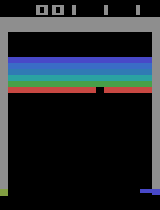


Final Results:
Episode 1: Score = 3.00
Episode 2: Score = 1.00
Episode 3: Score = 0.00
Episode 4: Score = 1.00
Episode 5: Score = 1.00


In [8]:
episodes = 5
episode_scores=[]
for episode in range(1, episodes + 1):
    obs = env.reset()
    done = False
    score = 0

    while not done:
        frame = env.render()
        # Convert RGB to BGR (OpenCV uses BGR format)
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        # Convert to PIL image and display
        img = Image.fromarray(frame)
        clear_output(wait=True)
        display(img)

        action = env.action_space.sample()
        obs, reward, done, info, _ = env.step(action)
        score += reward

    episode_scores.append(score)
    #print(f'Episode {episode}: Score = {score:.2f}')

env.close()

# Print all episodes' scores in final output
print("\nFinal Results:")
for i, score in enumerate(episode_scores, start=1):
    print(f"Episode {i}: Score = {score:.2f}")

## 3. Vectorise Environment and Train Model

In [9]:
env = make_atari_env('ALE/Breakout-v5', n_envs=4, seed=0)
#4 envs to make it faster
env = VecFrameStack(env, n_stack=4)

In [10]:
env.reset()

array([[[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        ...,

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]],


       [[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0

In [11]:
frame = env.render()
frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
cv2.imshow("CartPole", frame)
cv2.waitKey(5000)  # 1ms delay
cv2.destroyAllWindows()
env.close()

In [12]:
log_path = os.path.join('Training', 'Logs')
model = A2C('CnnPolicy', env, verbose=1, tensorboard_log = log_path)

Using cuda device
Wrapping the env in a VecTransposeImage.


In [13]:
model.learn(total_timesteps=100000)
#Increase the number for better performance

Logging to Training\Logs\A2C_4
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 240      |
|    ep_rew_mean        | 2        |
| time/                 |          |
|    fps                | 174      |
|    iterations         | 100      |
|    time_elapsed       | 11       |
|    total_timesteps    | 2000     |
| train/                |          |
|    entropy_loss       | -1.38    |
|    explained_variance | 0.581    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.193    |
|    value_loss         | 0.0839   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 245      |
|    ep_rew_mean        | 2.11     |
| time/                 |          |
|    fps                | 178      |
|    iterations         | 200      |
|    time_elapsed       | 22       |
|    total_timesteps    | 4000     |
| train

## 4. Save and Reload Model

In [12]:
a2c_path = os.path.join('Training','Saved Models','A2C_100K_Model')
model.save(a2c_path)

In [13]:
del model

In [3]:
a2c_path = os.path.join('Training','Saved Models','A2C_100K_Model')
model = A2C.load(a2c_path, env)

Wrapping the env in a VecTransposeImage.


In [14]:
env = make_atari_env('ALE/Breakout-v5', n_envs=1, seed=0)
env = VecFrameStack(env, n_stack=4)

## 5. Evaluate and Test

In [15]:
env = make_atari_env('ALE/Breakout-v5', n_envs=1, seed=0)
env = VecFrameStack(env, n_stack=4)
evaluate_policy(model, env, n_eval_episodes=5, render=True, return_episode_rewards=True)

C:\Users\rocha\anaconda3\envs\py310_env\lib\site-packages\gymnasium\utils\passive_env_checker.py:335: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


([9.0, 13.0, 19.0, 19.0, 14.0], [520, 650, 652, 681, 708])

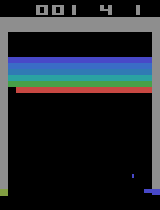

In [16]:
# One way to visualize
env = make_atari_env('ALE/Breakout-v5', n_envs=1, seed=0)
env = VecFrameStack(env, n_stack=4)
obs = env.reset()
for i in range(1300):
    action, _states = model.predict(obs, deterministic=True) 
    obs, rewards, dones, info = env.step(action) 

    frame = env.render()
    # Convert RGB to BGR (OpenCV uses BGR format)
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    # Convert to PIL image and display
    img = Image.fromarray(frame)
    clear_output(wait=True)
    display(img)

## 6. Try to play the game yourself!!!
### Left Button and Right Button to move. Space button to launch the ball 

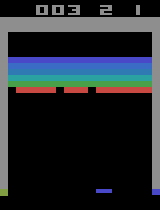

KeyboardInterrupt: 

In [3]:
import pygame
from pygame.locals import *
import time

# Initialize pygame for keyboard input
pygame.init()
screen = pygame.display.set_mode((400, 300))  # Dummy window to capture key events

# Create the environment
env = gym.make("ALE/Breakout-v5", render_mode="rgb_array")
obs, info = env.reset()

# Action Mapping
ACTIONS = {
    K_LEFT: 3,   # Move paddle left
    K_RIGHT: 2,  # Move paddle right
    K_SPACE: 1,  # Fire ball
    None: 0      # Do nothing
}

running = True
while running:
    action = 0  # Default action (do nothing)

    # Get user input
    for event in pygame.event.get():
        if event.type == QUIT:
            running = False
        elif event.type == KEYDOWN:
            if event.key in ACTIONS: 
                action = ACTIONS[event.key]

    # Step the environment
    obs, reward, done, truncated, info = env.step(action)

    # Render the frame
    frame = env.render()
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR
    clear_output(wait=True)  # Clear previous frame
    display(Image.fromarray(frame))  # Display frame
    time.sleep(0.1)  # Adjust this value to control speed (e.g., 0.1 for slower)

    
    if done:  # Reset if game is over
        obs, info = env.reset()

env.close()
pygame.quit()